In [1]:
# plot the zonal mean wind feild in y-z cross-section

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker
# from matplotlib.mlab import bivariate_normal
import math

import cartopy.crs as ccrs
import xarray as xr
from tqdm import tqdm

In [5]:
ds = xr.open_dataset('/n/home12/hongwei/HONGWEI/data/GEOS-Chem/gcgrid/data/ExtData/GEOS_2x2.5/MERRA2/2015/01/MERRA2.20150101.A3dyn.2x25.nc4')
ds

<xarray.Dataset>
Dimensions:  (lat: 91, lev: 72, lon: 144, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T01:30:00 ... 2015-01-01T22:30:00
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * lat      (lat) float32 -90.0 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Data variables:
    DTRAIN   (time, lev, lat, lon) float32 ...
    OMEGA    (time, lev, lat, lon) float32 ...
    RH       (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
Attributes:
    Title:                 MERRA2 time-averaged 3-hour dynamical parameters (...
    Contact:               GEOS-Chem Support Team (geos-chem-support@as.harva...
    References:            www.geos-chem.org; wiki.geos-chem.org
    Filename:              MERRA2.20150101.A3dyn.2x25.nc4
    History:               File generated on: 2016/04/28 09:56:10 GMT-0300
    ProductionDateTime:    File generated on: 2016/04/28 09:56:10 GMT-0300
    ModificationDateTime:  File generated on: 2016/04/28 09:56:10 GMT-0300
    Format:                NetCDF-4
    SpatialCoverage:       global
    Conventions:           COARDS
    Version:               MERRA2
    VersionID:             5.12.4
    Nlayers:               72
    Start_Date:            20150101
    Start_Time:            00:00:00.0
    End_Date:              20150101
    End_Time:              23:59:59.99999
    Delta_Time:            030000
    Delta_Lon:             2.5
    Delta_Lat:             2

In [50]:
lat = ds['lat']
lon = ds['lon']
lev = ds['lev']

omega = ds['OMEGA']
vwnd = ds['V']
uwnd = ds['U']
omega

<xarray.DataArray 'OMEGA' (time: 8, lev: 72, lat: 91, lon: 144)>
array([[[[ 3.983052e-02, ...,  3.983052e-02],
         ...,
         [-1.772563e-02, ..., -1.772563e-02]],

        ...,

        [[-1.060383e-05, ..., -1.060383e-05],
         ...,
         [ 1.026710e-05, ...,  1.026710e-05]]],


       ...,


       [[[-2.372140e-02, ..., -2.372140e-02],
         ...,
         [-1.438302e-02, ..., -1.438302e-02]],

        ...,

        [[-8.440920e-06, ..., -8.440920e-06],
         ...,
         [-7.453718e-06, ..., -7.453718e-06]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T01:30:00 ... 2015-01-01T22:30:00
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * lat      (lat) float32 -90.0 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 90.0
  * lon      (lon) float32 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Attributes:
    long_name:       vertical_pressure_velocity
    standard_name:   vertical_pressure_velocity
    units:           Pa s-1
    gamap_category:  GMAO-3D$

In [36]:
omega_mean = omega.mean(dim=['time','lon'])
vwnd_mean = vwnd.mean(dim=['time','lon'])

uwnd_mean = uwnd.mean(dim=['time','lon'])
uwnd_mean

<xarray.DataArray 'U' (lev: 72, lat: 91)>
array([[ 1.3050106e-05, -3.1324930e+00, -3.7943611e+00, ...,
        -3.1119184e+00, -1.9138391e+00, -3.4570694e-06],
       [ 9.6029703e-07, -4.6066656e+00, -5.6532388e+00, ...,
        -4.4975576e+00, -2.8121343e+00, -1.5364752e-05],
       [-2.6623409e-06, -4.3600540e+00, -5.7834501e+00, ...,
        -4.9542742e+00, -3.6972754e+00,  6.5247215e-05],
       ...,
       [-3.8411881e-06, -2.4110858e+00, -6.8798470e+00, ...,
        -1.7632011e+00, -1.0851830e+00,  1.8808577e-06],
       [ 2.0007292e-05, -3.1900187e+00, -7.7604389e+00, ...,
        -1.6683261e+00, -1.0597970e+00,  1.7563501e-05],
       [ 3.2580559e-05, -5.0842333e+00, -1.0306287e+01, ...,
        -1.8991644e+00, -1.0995721e+00, -7.8996025e-05]], dtype=float32)
Coordinates:
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * lat      (lat) float32 -90.0 -88.0 -86.0 -84.0 -82.0 ... 84.0 86.0 88.0 90.0

Text(0.5, 1.0, 'omega [Pa/s] negative value means upward')

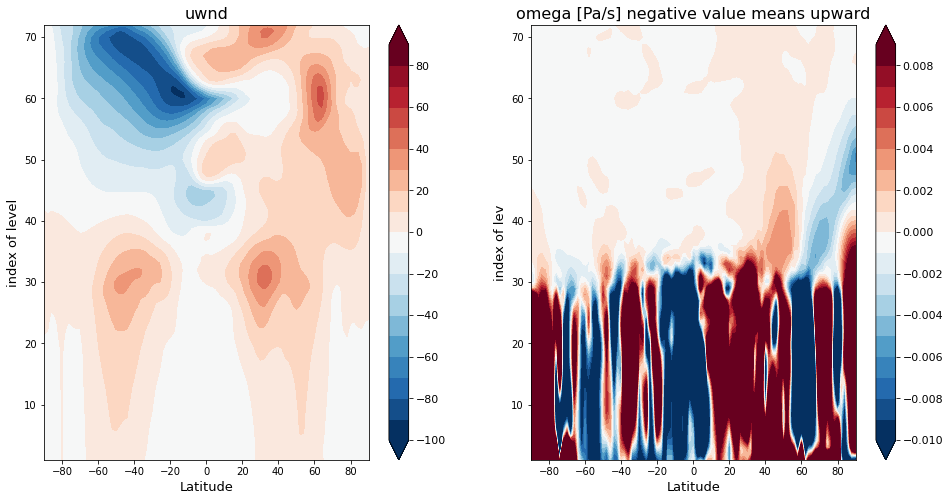

In [55]:
# plot  -----------------------------------------

y  = lat
z  = lev

Y, Z = np.meshgrid(y, z)

plt.figure(figsize=(16,8))

levels = np.arange(-100,100,10)
norm = colors.BoundaryNorm(boundaries=levels,  ncolors=256)
    
# temp_merra2
ax1 = plt.subplot(1, 2, 1);
ax1_contours = ax1.contourf(Y, Z, uwnd_mean, levels=levels, norm=norm, cmap='RdBu_r', extend="both") 

plt.plot()

cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)

ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('index of level', fontsize=13)
ax1.set_title('uwnd', fontsize=16)


# temp_merra2
ax1 = plt.subplot(1, 2, 2);

levels = np.arange(-0.01,0.01,0.001)
norm = colors.BoundaryNorm(boundaries=levels,  ncolors=256)

ax1_contours = ax1.contourf(Y, Z, omega_mean, levels=levels, norm=norm, cmap='RdBu_r', extend="both") 

cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)

ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('index of lev', fontsize=13)
ax1.set_title('omega [Pa/s] negative value means upward', fontsize=16)

Text(0.5, 1.0, 'uwnd at 20 hPa')

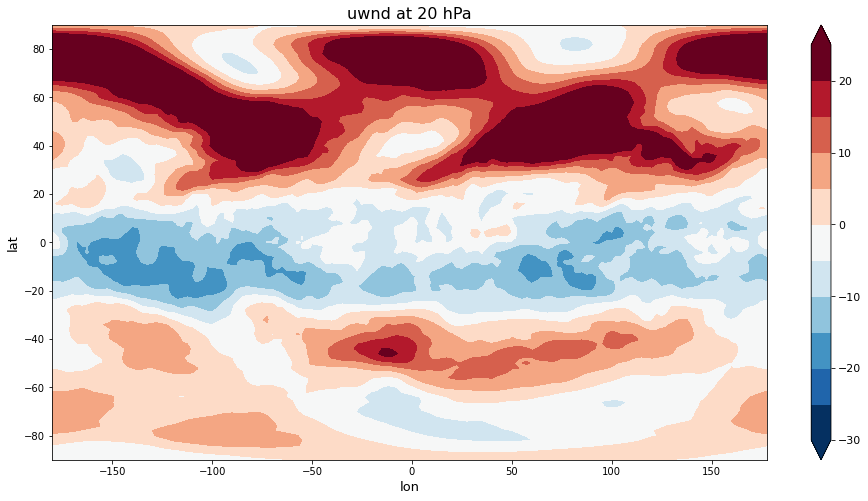

In [53]:
# plot  -----------------------------------------
ilev = 38

y  = lat
x  = lon

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(16,8))

levels = np.arange(-30,30,5)
norm = colors.BoundaryNorm(boundaries=levels,  ncolors=256)
    
# temp_merra2
ax1 = plt.subplot(1, 1, 1);
ax1_contours = ax1.contourf(X, Y, uwnd[0,ilev,:,:], levels=levels, norm=norm, cmap='RdBu_r', extend="both") 

cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)

ax1.set_xlabel('lon', fontsize=13)
ax1.set_ylabel('lat', fontsize=13)
ax1.set_title('uwnd at 20 hPa', fontsize=16)

Text(0.5, 1.0, 'omage at 20 hPa')

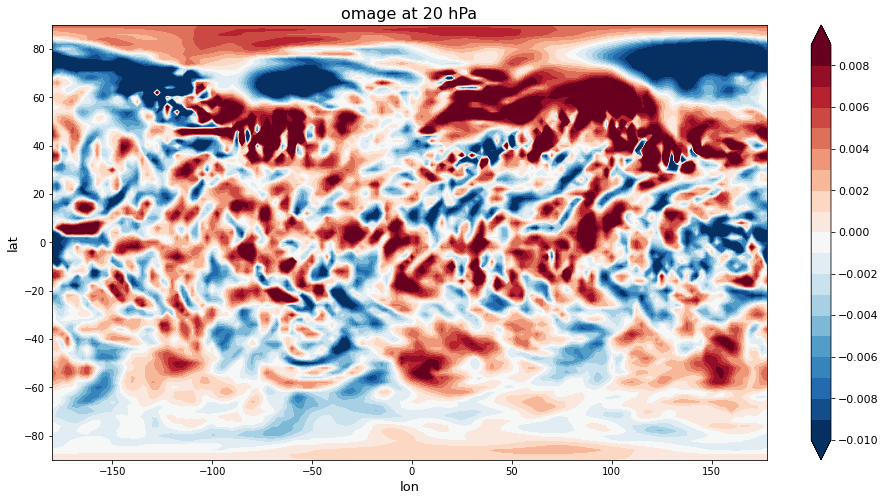

In [54]:
# plot  -----------------------------------------
ilev = 38

y  = lat
x  = lon

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(16,8))

levels = np.arange(-0.01,0.01,0.001)
norm = colors.BoundaryNorm(boundaries=levels,  ncolors=256)
    
# temp_merra2
ax1 = plt.subplot(1, 1, 1);
ax1_contours = ax1.contourf(X, Y, omega[0,ilev,:,:], levels=levels, norm=norm, cmap='RdBu_r', extend="both") 

cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)

ax1.set_xlabel('lon', fontsize=13)
ax1.set_ylabel('lat', fontsize=13)
ax1.set_title('omage at 20 hPa', fontsize=16)